Stellar Classification

In [494]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna
from scipy.stats import kurtosis
from scipy.stats import entropy

In [478]:
df = pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [479]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [403]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [404]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [405]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

A lot of identifier columns. Pretty annoying

In [480]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID','spec_obj_ID', 'plate', 'MJD'], axis=1)
df

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [481]:
df['class'] = df['class'].map({'GALAXY':0, 'STAR':1, 'QSO': 2})
df.shape

(100000, 7)

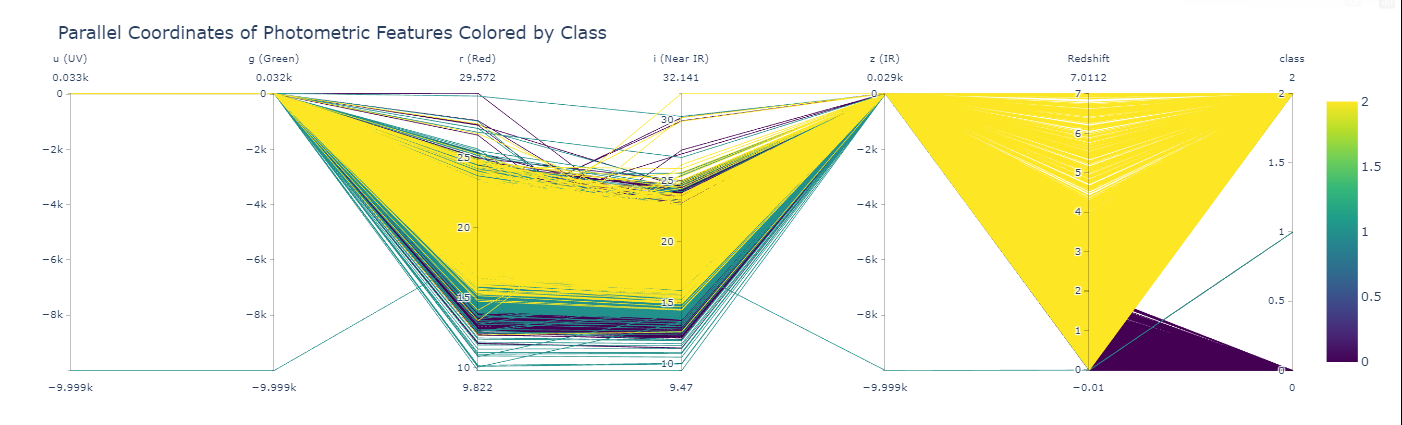

In [483]:
fig = go.Figure(data=go.Parcoords(
    line=dict(color=df['class'], colorscale='Viridis', showscale=True),
    dimensions=[
        dict(label='u (UV)', values=df['u']),
        dict(label='g (Green)', values=df['g']),
        dict(label='r (Red)', values=df['r']),
        dict(label='i (Near IR)', values=df['i']),
        dict(label='z (IR)', values=df['z']),
        dict(label='Redshift', values=df['redshift']),
        dict(label='class', values=df['class'])
    ]
))

fig.update_layout(
    title='Parallel Coordinates of Photometric Features Colored by Class',
)

Image('figures/parallel1.png')

There is a huge outlier

In [484]:
df = df[df['u'] > -4000]
df = df[df['r'] < 26]

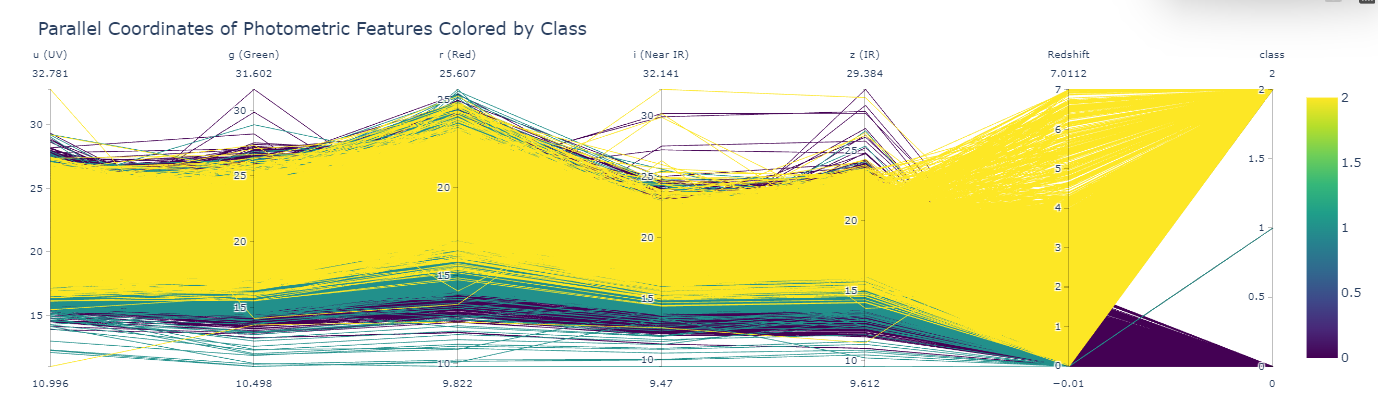

In [486]:
fig = go.Figure(data=go.Parcoords(
    line=dict(color=df['class'], colorscale='Viridis', showscale=True),
    dimensions=[
        dict(label='u (UV)', values=df['u']),
        dict(label='g (Green)', values=df['g']),
        dict(label='r (Red)', values=df['r']),
        dict(label='i (Near IR)', values=df['i']),
        dict(label='z (IR)', values=df['z']),
        dict(label='Redshift', values=df['redshift']),
        dict(label='class', values=df['class'])
    ]
))

fig.update_layout(
    title='Parallel Coordinates of Photometric Features Colored by Class',
)

Image('figures/parallel2.png')

Unlike galaxies or quasars, stars do not show the cosmological redshift caused by the expansion of the universe, so 'Redshift' should be zero for all class ones. I will continue to remove more outliers in this fashion.

In [487]:
df = df[df['i'] < 26]
df = df[df['g'] < 27.5]
df = df[df['z'] < 24.5]
df = df[df['u'] > 13]
df = df[df['g'] > 12]
df = df[df['z'] > 11]

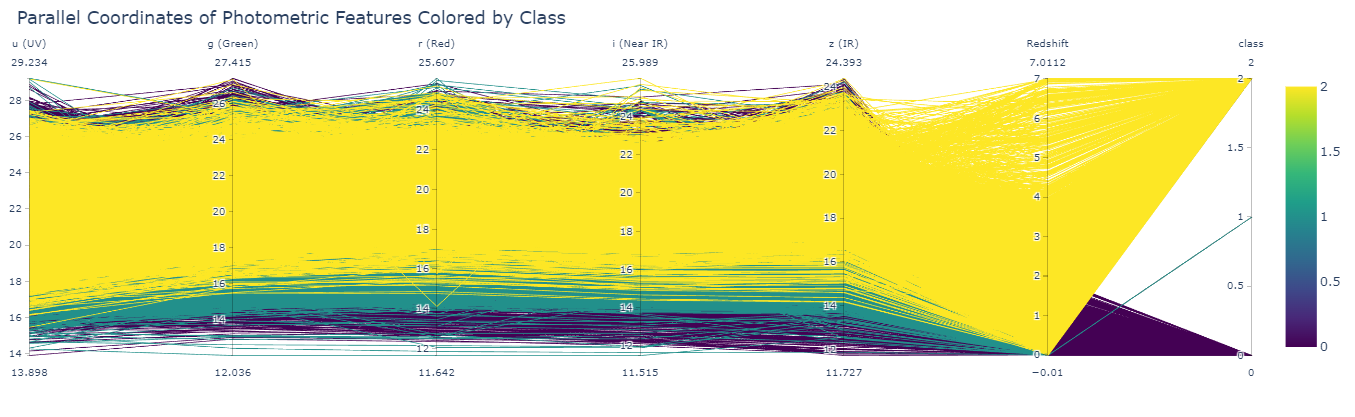

In [489]:
fig = go.Figure(data=go.Parcoords(
    line=dict(color=df['class'], colorscale='Viridis', showscale=True),
    dimensions=[
        dict(label='u (UV)', values=df['u']),
        dict(label='g (Green)', values=df['g']),
        dict(label='r (Red)', values=df['r']),
        dict(label='i (Near IR)', values=df['i']),
        dict(label='z (IR)', values=df['z']),
        dict(label='Redshift', values=df['redshift']),
        dict(label='class', values=df['class'])
    ]
))

fig.update_layout(
    title='Parallel Coordinates of Photometric Features Colored by Class',
)

Image('figures/parallel3.png')

In [443]:
df.shape

(99950, 7)

Exactly 50 values removed.

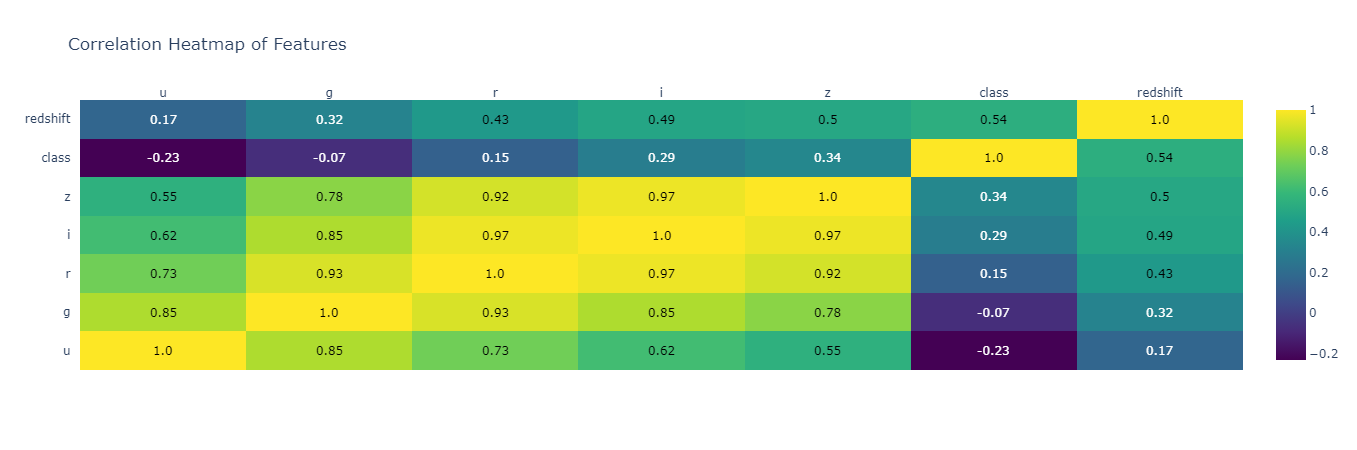

In [490]:
corr = df.corr()
z = np.round(corr.values, 2)

fig = ff.create_annotated_heatmap(
    z=z,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    showscale=True,
    colorscale='Viridis'
)

fig.update_layout(title='Correlation Heatmap of Features')
Image('figures/heatmap.png')

Redshift has a high correlation partly due to all of class 1 being 0. Adding new features with the help of chat-gpt. All features added are highly correlated with class and improves model performance.

In [491]:
# Color indices — common in astronomy, indicate object temperature/type
df['u_g'] = df['u'] - df['g']  # Ultraviolet to green difference
df['g_r'] = df['g'] - df['r']  # Green to red difference
df['r_i'] = df['r'] - df['i']  # Red to near-infrared difference
df['i_z'] = df['i'] - df['z']  # Near-IR to IR difference

# Composite color indices — capture broader color range
df['u_r'] = df['u'] - df['r']  # UV to red
df['g_z'] = df['g'] - df['z']  # Green to IR

# Mean flux — average brightness across all bands, can reflect luminosity
df['mean_flux'] = df[['u', 'g', 'r', 'i', 'z']].mean(axis=1)

# Brightest and faintest filter — useful for contrast information
df['max_flux'] = df[['u', 'g', 'r', 'i', 'z']].max(axis=1)  # Brightest band
df['min_flux'] = df[['u', 'g', 'r', 'i', 'z']].min(axis=1)  # Faintest band

# Flux range — dynamic range of object's brightness
df['flux_range'] = df['max_flux'] - df['min_flux']

# Slope from UV to IR — indicates how brightness changes across spectrum
df['slope_u_z'] = (df['u'] - df['z']) / (df['u'] + df['z'] + 1e-5)

# Photometric curvature — measure of color curvature (nonlinearity)
df['photometric_curvature'] = df['g'] - 2 * df['r'] + df['i']

# Red/blue light ratio — can distinguish redder (older) vs bluer (younger) objects
df['red_blue_ratio'] = (df['i'] + df['z']) / (df['u'] + df['g'] + 1e-5)

# Standard deviation of magnitudes — measures variability across bands
df['color_std'] = df[['u', 'g', 'r', 'i', 'z']].std(axis=1)

# r-band centered — how r differs from average of g and i
df['r_band_centered'] = df['r'] - (df['g'] + df['i']) / 2

# Fractional fluxes — percent contribution of each band to total flux
total_flux = df[['u', 'g', 'r', 'i', 'z']].sum(axis=1) + 1e-5
df['u_frac'] = df['u'] / total_flux  # UV percent
df['g_frac'] = df['g'] / total_flux  # Green percent
df['r_frac'] = df['r'] / total_flux  # Red percent
df['i_frac'] = df['i'] / total_flux  # Near-IR percent
df['z_frac'] = df['z'] / total_flux  # IR percent

# Kurtosis of flux — measures 'peakedness' of flux distribution across bands
df['flux_kurtosis'] = df[['u', 'g', 'r', 'i', 'z']].kurtosis(axis=1)

# Color curvature — cumulative second derivative of color gradients
df['color_curvature'] = (df['u'] - 2 * df['g'] + df['r']) + \
                        (df['g'] - 2 * df['r'] + df['i']) + \
                        (df['r'] - 2 * df['i'] + df['z'])

#Tilt — overall shift from blue (u, g) to red (i, z) side
df['tilt'] = (df['i'] + df['z']) - (df['u'] + df['g'])

# Entropy of flux distribution — how evenly light is spread across bands
fluxes = df[['u', 'g', 'r', 'i', 'z']].values
fluxes = fluxes / (fluxes.sum(axis=1, keepdims=True) + 1e-8)
df['flux_entropy'] = entropy(fluxes.T)


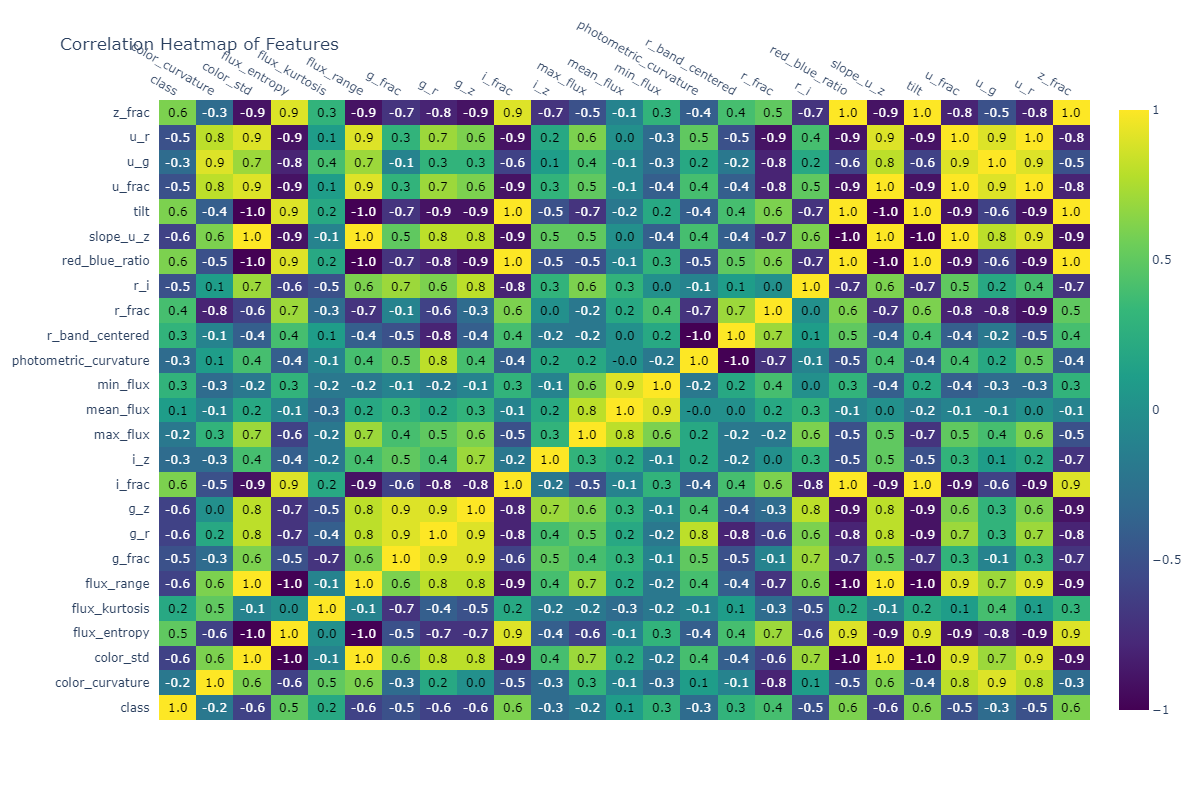

In [493]:
feature_cols = df.columns.difference(['u', 'g', 'r', 'i', 'z', 'redshift'])
corr = df[feature_cols].corr()
z = np.round(corr.values, 1)

fig = ff.create_annotated_heatmap(
    z=z,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    showscale=True,
    colorscale='Viridis'
)

fig.update_layout(title='Correlation Heatmap of Features', width=1200, height=800)
fig.update
Image('figures/heatmap2.png')


That heatmap shows correlation without original features.

In [462]:
y = df['class']
X = df.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (79960, 30)
X_test shape: (19990, 30)
y_train shape: (79960,)
y_test shape: (19990,)


In [418]:
models = {'CatBoost':CatBoostClassifier(random_state=62, verbose=0), 'XGB':XGBClassifier(random_state=62, verbosity=0), 'LGBM': LGBMClassifier(random_state=62,verbose=-1)}
for name, model in models.items():
    print(f"{name} accuracy: {np.mean(cross_val_score(model, X_train, y_train,cv=5))}")

CatBoost accuracy: 0.9789019509754878
XGB accuracy: 0.9772011005502751
LGBM accuracy: 0.9789644822411205


CatBoost accuracy: 0.9789019509754878
XGB accuracy: 0.9772011005502751
LGBM accuracy: 0.9789644822411205

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    model = LGBMClassifier(**params, random_state=62, verbose=-1)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()  # Optuna maximizes by default

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Output the best results
print("Best Accuracy:", study.best_value)
print("Best Hyperparameters:", study.best_params)

Best Accuracy: 0.9794397198599298
Best Hyperparameters: {'n_estimators': 506, 'max_depth': 10, 'learning_rate': 0.10775347157171246, 'subsample': 0.9999465294210166, 'colsample_bytree': 0.5960237817125218, 'reg_alpha': 4.831241641356589, 'reg_lambda': 2.6641968551150597, 'min_child_samples': 13}


In [496]:
lg = LGBMClassifier(n_estimators= 506,
                    max_depth= 10,
                    learning_rate= 0.10775347157171246,
                    subsample= 0.9999465294210166,
                    colsample_bytree= 0.5960237817125218,
                    reg_alpha= 4.831241641356589,
                    reg_lambda= 2.6641968551150597,
                    min_child_samples= 13, 
                    random_state=62,
                    verbose=-1).fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.980440220110055


LGBM Classifier achieved a 97.94% train accuracy, and a 98.04% test accuracy

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20)
    }

    model = XGBClassifier(**params, random_state=62)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best Accuracy:", study.best_value)
print("Best Hyperparameters:", study.best_params)

Trial 12 finished with value: 0.9781390695347673 and parameters: {'n_estimators': 608, 'max_depth': 12, 'learning_rate': 0.16907078997907377, 'subsample': 0.7064213244955417, 'colsample_bytree': 0.5513661838203805, 'reg_alpha': 3.4094709113646964, 'reg_lambda': 4.010194573368155, 'gamma': 1.2626609855347377, 'min_child_weight': 14}. Best is trial 12 with value: 0.9781390695347673.


In [468]:
xgb = XGBClassifier(n_estimators= 608,
                    max_depth= 12, 
                    learning_rate= 0.16907078997907377, 
                    subsample= 0.7064213244955417, 
                    colsample_bytree= 0.5513661838203805, 
                    reg_alpha= 3.4094709113646964, 
                    reg_lambda= 4.010194573368155, 
                    gamma= 1.2626609855347377, 
                    min_child_weight= 14,
                    random_state=62).fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9779889944972486


XGB achieved a training accuracy of 97.81% and a test accuracy of 97.80%

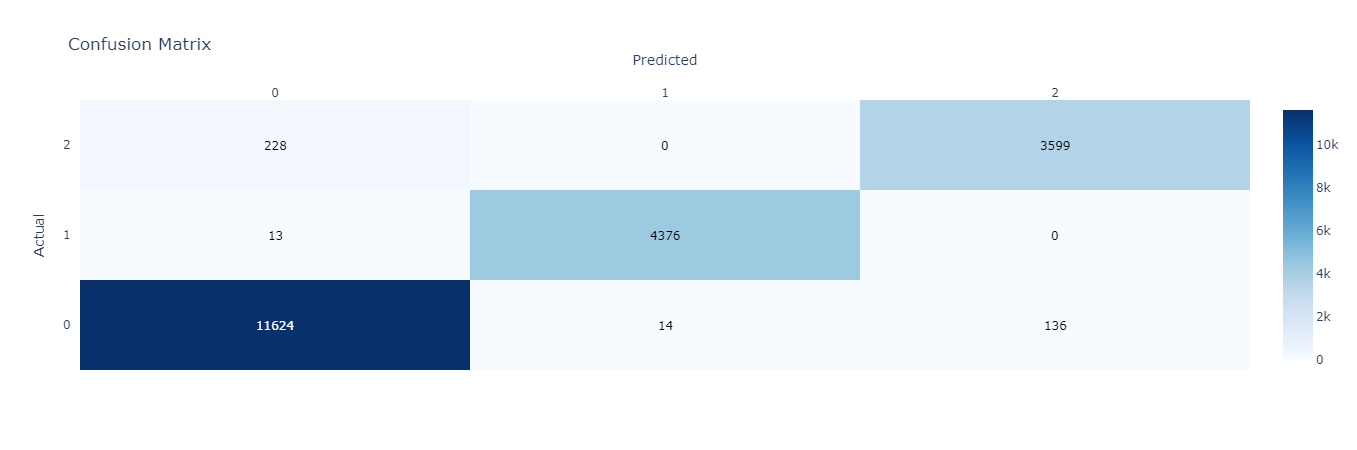

In [498]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))

z_text = [[str(y) for y in x] for x in cm]

fig = ff.create_annotated_heatmap(
    z=cm,
    x=labels,
    y=labels,
    annotation_text=z_text,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted",
    yaxis_title="Actual"
)
Image('figures/confusion.png')
